# Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition

### Solution notebook by Shweta Chandole
#### Date: 12-Dec-2021

Welcome to the project on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a CNN model that can identify the digits in the images.

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [4]:
print(tf.__version__)

2.7.0


## **Load the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [5]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/ADSP/Deep Learning/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [6]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

#### **Question 1: Complete the below code to visualize the first 10 images from the training data (1 Mark)**

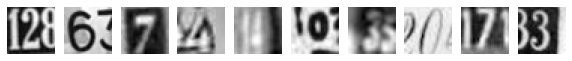

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [7]:
# Adding code to answer Q1 -ShwetaC 

# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # write the function to visualize images #SC
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data Preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape
- Normalize the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [8]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [9]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [10]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


#### **Question 2: One-hot encode the labels in the target variable y_train and y_test (2 Marks)**

In [12]:
# Adding code to answer Q2 -ShwetaC

#Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [13]:
# checking target variables single records after Q2 answer -ShwetaC

print('y_train[0] = ', y_train[0], '\ny_test[0] = ', y_test[0]) 

y_train[0] =  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
y_test[0] =  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
# Checking new shape after one-hot encoding -ShwetaC

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((42000, 32, 32, 1), (42000, 10), (18000, 32, 32, 1), (18000, 10))

- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now, we have done data preprocessing, let's build a CNN model.

In [15]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Question 3: Build and train a CNN model as per the above mentioned architecture (10 Marks)**

In [16]:
# Adding code to answer Q3 - ShwetaC

#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence                      #SC
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))    #first layer
    model.add(LeakyReLU(0.1))   #second layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))    #third layer
    model.add(LeakyReLU(0.1))   #fourth layer
    model.add(MaxPooling2D(pool_size=(2, 2)))   #fifth layer
    model.add(Flatten())    #sixth layer
    model.add(Dense(32))    #seventh layer
    model.add(LeakyReLU(0.1))   #eighth layer
    model.add(Dense(10, activation='softmax'))  #ninth layer

    #declare adam optimizer with learning rate of 0.001 
    adamopt = optimizers.Adam(learning_rate=0.001)       #SC
    
    #compile the model
    model.compile(loss= 'categorical_crossentropy', optimizer=adamopt, metrics= ['accuracy'])     #SC
    
    return model

In [17]:
#Build the model
model_1 = cnn_model_1()

In [18]:
#Print the model summary
model_1.summary()         #SC

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [19]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=20, batch_size=32)    #SC

Epoch 1/20
1050/1050 [==============================] - 20s 10ms/step - loss: 1.1925 - accuracy: 0.6064 - val_loss: 0.6467 - val_accuracy: 0.8125
Epoch 2/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.5312 - accuracy: 0.8482 - val_loss: 0.5089 - val_accuracy: 0.8557
Epoch 3/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.4433 - accuracy: 0.8727 - val_loss: 0.4975 - val_accuracy: 0.8593
Epoch 4/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3894 - accuracy: 0.8870 - val_loss: 0.4474 - val_accuracy: 0.8787
Epoch 5/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3482 - accuracy: 0.8958 - val_loss: 0.4755 - val_accuracy: 0.8654
Epoch 6/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3050 - accuracy: 0.9097 - val_loss: 0.4675 - val_accuracy: 0.8718
Epoch 7/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.2762 - accuracy: 0.9166 - val_loss: 0.4556 - 

### **Plotting the validation and training accuracies**

#### **Question 4: Write your observations on the below plot (2 Marks)**

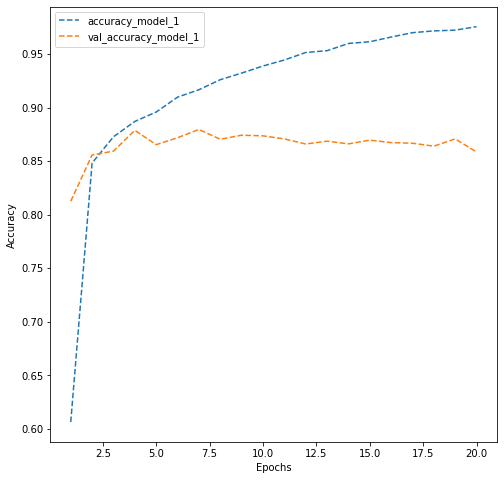

In [20]:
# Adding code to answer Q4 - ShwetaC

# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy_model_1')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy_model_1')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations: (Q4 Answer _-ShwetaC_)**

- Accuracy of model 1 fitting on training data starts around 60% and increases rapidly within first 2 epochs. It keeps increasing thereonwards going over 97% as number of epochs increase to 20.
- On the other hand, validation accuracy starts around 81% and goes up to 85%, with very small increase for first 5 epochs, and becoming constant with small variations after that.
- This implies that the model is fitting very well on the training data but cannot generalize the performance on validation data which is a sign of overfitting.
- From the model fitting output above, we can also see that while the training loss decreases with increasing epochs, the validation loss remains constant over all epochs. 


Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [21]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [22]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **dropout layer with rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Question 5: Build and train the second CNN model as per the above mentioned architecture (10 Marks)**

In [23]:
# Adding code to answer Q5 - ShwetaC

#Define the function
def cnn_model_2():
    model = Sequential() 
    
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))       #first layer
    model.add(LeakyReLU(0.1))       #second layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))        #third layer
    model.add(LeakyReLU(0.1))       #fourth layer
    model.add(MaxPooling2D(pool_size=(2, 2)))		#fifth layer
    model.add(BatchNormalization())           #sixth layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))		    #seventh layer
    model.add(LeakyReLU(0.1))       #eighth layer
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))		    #ninth layer
    model.add(LeakyReLU(0.1))       #tenth layer
    model.add(MaxPooling2D(pool_size=(2, 2)))		    #eleventh layer
    model.add(BatchNormalization())           #twelvth layer
    model.add(Flatten())        #thirteenth layer
    model.add(Dense(32))        #fourteenth layer
    model.add(LeakyReLU(0.1))   #fifteenth layer
    model.add(Dropout(0.5))		#sixteenth layer
    model.add(Dense(10, activation='softmax'))  #seventeenth layer

    #declare adam optimizer with learning rate of 0.001 
    adamopt = optimizers.Adam(learning_rate=0.001)       #SC
    
    #compile the model
    model.compile(loss= 'categorical_crossentropy', optimizer=adamopt, metrics= ['accuracy'])     #SC
    
    return model

In [24]:
# Build the model
model_2 = cnn_model_2()           #SC

In [25]:
#Print the summary
model_2.summary()                 #SC

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [26]:
# Fit the model
history_model_2 = model_2.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=30, batch_size=128)    #SC

Epoch 1/30
263/263 [==============================] - 7s 24ms/step - loss: 1.4765 - accuracy: 0.4981 - val_loss: 3.1119 - val_accuracy: 0.2204
Epoch 2/30
263/263 [==============================] - 6s 22ms/step - loss: 0.6989 - accuracy: 0.7854 - val_loss: 0.6970 - val_accuracy: 0.7793
Epoch 3/30
263/263 [==============================] - 6s 22ms/step - loss: 0.5659 - accuracy: 0.8260 - val_loss: 0.4969 - val_accuracy: 0.8568
Epoch 4/30
263/263 [==============================] - 6s 22ms/step - loss: 0.5045 - accuracy: 0.8470 - val_loss: 0.4521 - val_accuracy: 0.8669
Epoch 5/30
263/263 [==============================] - 6s 22ms/step - loss: 0.4536 - accuracy: 0.8641 - val_loss: 0.3976 - val_accuracy: 0.8873
Epoch 6/30
263/263 [==============================] - 6s 22ms/step - loss: 0.4119 - accuracy: 0.8736 - val_loss: 0.4059 - val_accuracy: 0.8870
Epoch 7/30
263/263 [==============================] - 6s 22ms/step - loss: 0.3869 - accuracy: 0.8810 - val_loss: 0.3794 - val_accuracy: 0.8933

### **Plotting the validation and training accuracies**

#### **Question 6: Write your observations on the below plot (2 Marks)**

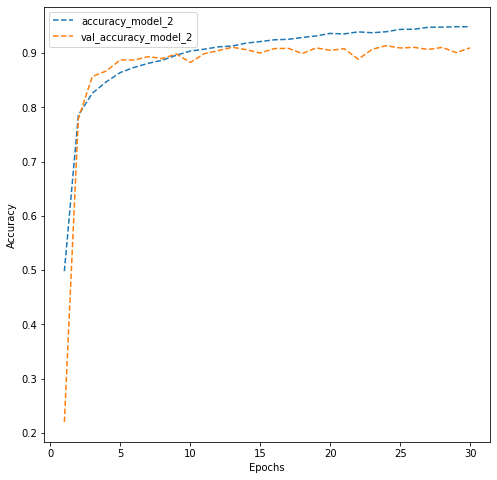

In [27]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy_model_2')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy_model_2')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations: (Q6 Answer _-ShwetaC_)**

- Accuracy of model 2 fitting over training data starts lower around 50% but increases exponentially to above 80% by first 2-3 epochs. 
- Validation accuracy also increases drastically from 22%  to over 85% within first 2 epochs. 
- The accuracy for training data keeps increasing steadily as the number of epochs increases. 
- Validation accuracy becomes somewhat constant but it is still close to the training accuracy till the last epoch. 
- Training and validation loss decrease significantly as the number of epochs increase as can be seen from the output of model fitting step.
- We can say that the model 2 shows much better performance with increased complexity as compared to model 1.

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

#### **Question 7: Make predictions on the test data using the second model (1 Mark)**

In [28]:
# Adding code to answer Q7 - ShwetaC

#Make prediction on the test data using model_2 
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [29]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Question 8: Write your final observations on the performance of the model on the test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1814
           1       0.86      0.94      0.90      1828
           2       0.96      0.90      0.93      1803
           3       0.92      0.86      0.89      1719
           4       0.93      0.92      0.93      1812
           5       0.91      0.91      0.91      1768
           6       0.92      0.88      0.90      1832
           7       0.95      0.91      0.93      1808
           8       0.85      0.92      0.88      1812
           9       0.89      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



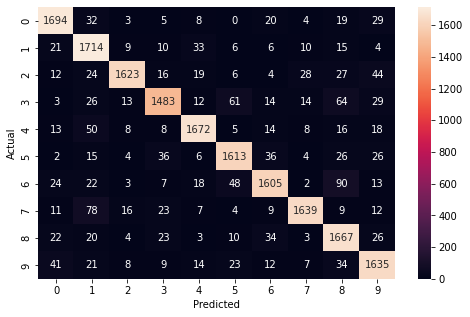

In [30]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations: (Q8 Answer _-ShwetaC_)**

- The classification report shows the classification metrics - precision, recall and f1-score for each class
- We can see that the classes ‘0’, ‘2’, '4' and ‘7’ have highest f1-score at 93%, followed by ‘5’ at 91%. 
- Even the classes ‘1’,’6’, ‘9’ have high f1-score of 90%
- Classes '3' and '8' each have a f1-score of 89% and 88%, where class ‘8’ has  the lowest precision at 85%
- The accuracy of prediction on test data using the second model is 91%, with a high precision and recall from 85% to 93% for all classes.
- We can conclude that the CNN model 2 that we built and fitted above is very good at making prediction of numerical images using the robust and complex architecture.